In [21]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd

class Generator:
    def __init__(self, seed=None):
        """
        Inicjalizuje klasę Generator.

        :param seed: Ziarno dla generatora liczb losowych. Jeśli None, zostanie użyte losowe ziarno.
        """
        self._random_state = np.random.RandomState(seed)

    def uniform(self, low=0.0, high=1.0, size=None):
        """
        Generuje liczby losowe z rozkładu jednostajnego.

        :param low: Dolne ograniczenie rozkładu.
        :param high: Górne ograniczenie rozkładu.
        :param size: Liczba generowanych liczb losowych. Jeśli None, generowana jest pojedyncza liczba losowa.
        :return: Liczba(y) losowa(e) z rozkładu jednostajnego.
        """
        if size is None:
            return low + (high - low) * self._random_state.random_sample()
        else:
            return low + (high - low) * self._random_state.random_sample(size)

def wykres_czasowo_aplitudowy(sygnal, czas_trwania, liczba_probek, tytul='', fig_size=(10, 5)):
    """
    Generuje wykres czasowo-amplitudowy.

    :param sygnal: Wartości sygnału.
    :param czas_trwania: Czas trwania sygnału.
    :param liczba_probek: Liczba próbek.
    :param tytul: Tytuł wykresu.
    :param fig_size: Rozmiar wykresu (szerokość, wysokość).
    """
    czas = np.linspace(0, czas_trwania, liczba_probek)
    plt.figure(figsize=fig_size)
    plt.plot(czas, sygnal)
    plt.title(f'Wykres czasowy {tytul}')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.grid(True)
    plt.show()

def histogram(szum_bialy, min, max, liczba_przedzialow, tytul='', fig_size=(10, 5)):
    """
    Generuje wykres histogramu.

    :param szum_bialy: Próbki szumu białego.
    :param min: Minimalna wartość dla przedziałów histogramu.
    :param max: Maksymalna wartość dla przedziałów histogramu.
    :param liczba_przedzialow: Liczba przedziałów w histogramie.
    :param tytul: Tytuł wykresu.
    :param fig_size: Rozmiar wykresu (szerokość, wysokość).
    """
    plt.figure(figsize=fig_size)
    x = np.linspace(min, max, 100)
    #plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=min, scale=max-min), 'b', linestyle='dotted', label=f'1/(b-a)={1/(max-min)}')
    plt.hist(szum_bialy, bins=liczba_przedzialow, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
    plt.title(f'Histogram {tytul}')
    plt.xlabel('Wartość')
    plt.ylabel('Częstość występowania')
    plt.legend()
    plt.grid(True)
    plt.show()

def avg(lst):
    """
    Oblicza średnią z listy liczb.

    :param lst: Lista liczb.
    :return: Średnia z liczb.
    """
    return sum(lst) / len(lst)

def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20, fg = None):
    # Tworzenie histogramu
    counts, bins = np.histogram(lista_probek, bins=ilosc_slupkow, range=zakres, density=True)
    
    # Obliczanie współrzędnych środków słupków
    x = (bins[1:] + bins[:-1]) / 2
    
    
    plt.bar(x, counts.cumsum(), width=(x[1]-x[0]), align='center', alpha=0.7)
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.title('Empiryczna dystrybuanta słupkowa')
    plt.grid(True)
    plt.show()
    
def dystrybuanta_slupkowa(lista_probek, zakres, ilosc_slupkow=20, fg=None):
    # Obliczanie dystrybuanty
    cdf_values = uniform.cdf(lista_probek, loc=zakres[0], scale=zakres[1] - zakres[0])
    sorted_cdf = np.sort(cdf_values)
    slupki = np.linspace(0, 1, ilosc_slupkow + 1)
    dystrybuanta = []
    for slupek in slupki[1:]:
        dystrybuanta.append(np.searchsorted(sorted_cdf, slupek, side='right') / len(lista_probek))
    
    # Obliczanie współrzędnych środków słupków
    x = np.linspace(zakres[0], zakres[1], ilosc_slupkow)
    
    # Dodanie referencyjnej, kropkowanej linii dla idealnej dystrybuanty dla rozkładu równomiernego
    if fg is None:
        idealne_probki = np.linspace(zakres[0], zakres[1], 1000)
        idealna_dystrybuanta = uniform.cdf(idealne_probki, loc=zakres[0], scale=zakres[1] - zakres[0])
        plt.plot(idealne_probki, idealna_dystrybuanta, 'b--', label='Idealna dystrybuanta równomierna')

    if fg:
        plt.title('Dystrybuanta przefiltrowanego szumu białego - częstotliwość graniczna= ' + str(fg) + "Hz")
    else:
        plt.title('Dystrybuanta szumu białego (porównanie idealnej dystrybuanty do rzeczywistej)')
    
    # Rysowanie dystrybuanty słupkowej
    
    # Rysowanie dystrybuanty słupkowej
    plt.bar(x, dystrybuanta, width=(zakres[1]-zakres[0])/ilosc_slupkow, align='center', alpha=0.7)
    plt.xlabel('Wartość')
    plt.ylabel('Dystrybuanta')
    plt.title('Empiryczna dystrybuanta słupkowa')
    plt.grid(True)
    plt.show()


gen = Generator()

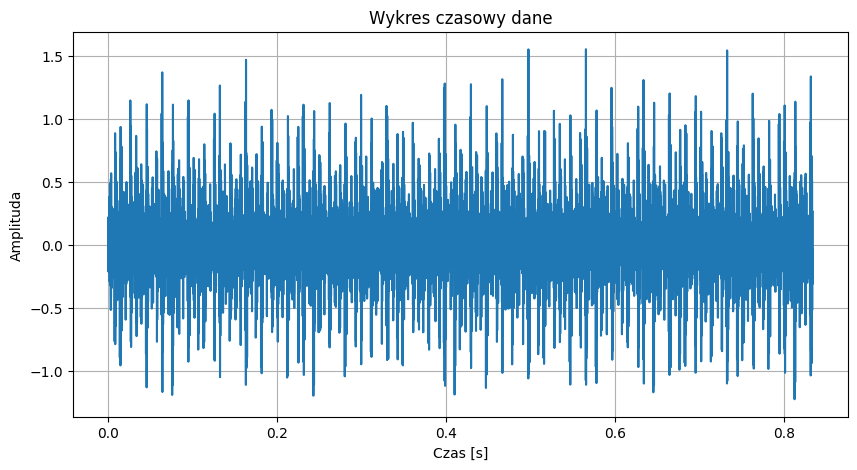

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


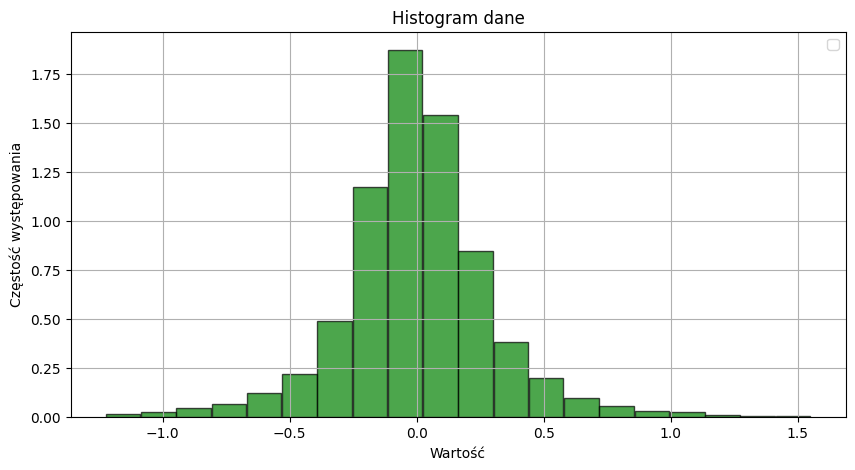

mean: 3.6203525127817754e-05


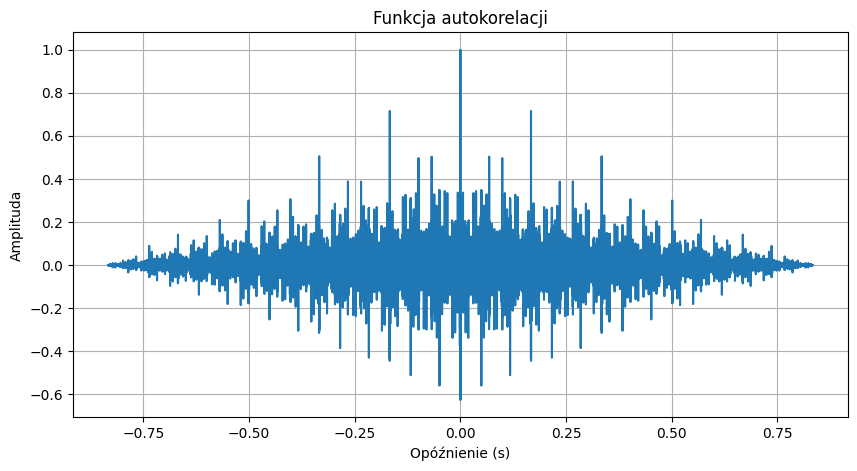

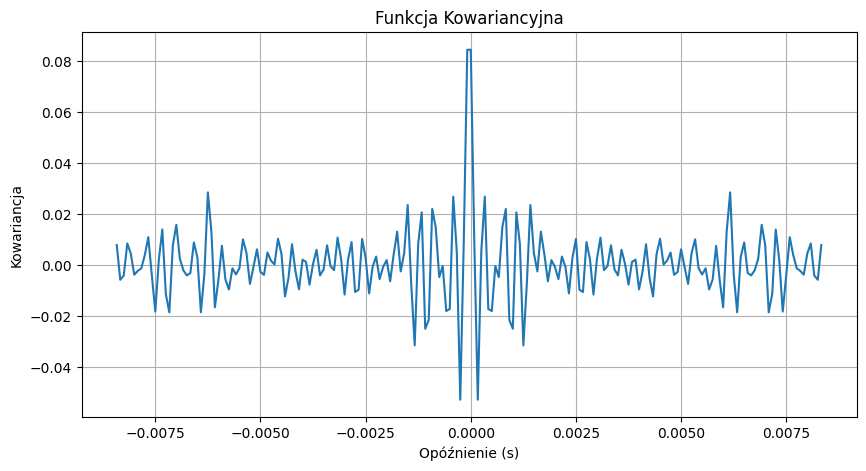

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, spectrogram

# Wczytanie danych z pliku
# Załóżmy, że plik nazywa się 'dane.txt' i zawiera próbki z częstotliwością próbkowania 12000Hz i 10000 próbek
# Wczytujemy dane jako 1-wymiarową tablicę numpy
dane = np.loadtxt('105_rawSignal_10000.txt')

CZESTOTLIWOSC_PROBKOWANIA = 12000
ILOSC_PROBEK = dane.size
CZAS_TRWANIA = ILOSC_PROBEK / CZESTOTLIWOSC_PROBKOWANIA

# Obliczanie funkcji autokorelacji
autokorelacja = correlate(dane, dane, mode='full')

# Normalizacja funkcji autokorelacji (opcjonalnie)
autokorelacja /= np.max(autokorelacja)


wykres_czasowo_aplitudowy(dane, CZAS_TRWANIA, 10000, 'dane')

histogram(dane, -1, 1, 20, 'dane')

numtaps = 31
warmup = numtaps

K=10000
K_f = K - warmup
M = K_f - 100
data = []
filtered_mean = dane[warmup:].mean()
print(f"mean: {filtered_mean}")

for j in range(0, 101):
    cov = 0

    for i in range(0, K_f - j):
        covariance_product = (dane[i + warmup] - filtered_mean) * (
            dane[i + warmup + j] - filtered_mean
        )
        cov += covariance_product

    data.append(cov / M)

    mantissa = int(str(K)[:2])
exponent = int(np.log10(K / 10))

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Wczytanie danych z pliku
dane = np.loadtxt('105_rawSignal_10000.txt')

CZESTOTLIWOSC_PROBKOWANIA = 12000
ILOSC_PROBEK = dane.size
CZAS_TRWANIA = ILOSC_PROBEK / CZESTOTLIWOSC_PROBKOWANIA

# Obliczanie funkcji autokorelacji
autokorelacja = correlate(dane, dane, mode='full')

# Normalizacja funkcji autokorelacji (opcjonalnie)
autokorelacja /= np.max(autokorelacja)

# Tworzenie wykresu funkcji autokorelacji
czas_autokorelacji = np.arange(-len(dane) + 1, len(dane)) / CZESTOTLIWOSC_PROBKOWANIA
plt.figure(figsize=(10, 5))
plt.plot(czas_autokorelacji, autokorelacja)
plt.title('Funkcja autokorelacji')
plt.xlabel('Opóźnienie (s)')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

# Obliczanie funkcji kowariancyjnej
numtaps = 31
warmup = numtaps
K = 10000
K_f = K - warmup
M = K_f - 100
filtered_mean = dane[warmup:].mean()

data = []
for j in range(0, 101):
    cov = 0
    for i in range(0, K_f - j):
        covariance_product = (dane[i + warmup] - filtered_mean) * (dane[i + warmup + j] - filtered_mean)
        cov += covariance_product
    data.append(cov / M)

# Odbicie lustrzane funkcji kowariancyjnej i połączenie
cov_data = np.array(data)
cov_data_reflected = np.flip(cov_data)
cov_full = np.concatenate((cov_data_reflected, cov_data))

# Tworzenie osi czasu dla funkcji kowariancyjnej
czas_kowariancji = np.arange(-len(cov_data_reflected), len(cov_data)) / CZESTOTLIWOSC_PROBKOWANIA

# Tworzenie wykresu funkcji kowariancyjnej
plt.figure(figsize=(10, 5))
plt.plot(czas_kowariancji, cov_full)
plt.title("Funkcja Kowariancyjna")
plt.xlabel("Opóźnienie (s)")
plt.ylabel("Kowariancja")
plt.grid(True)
plt.show()


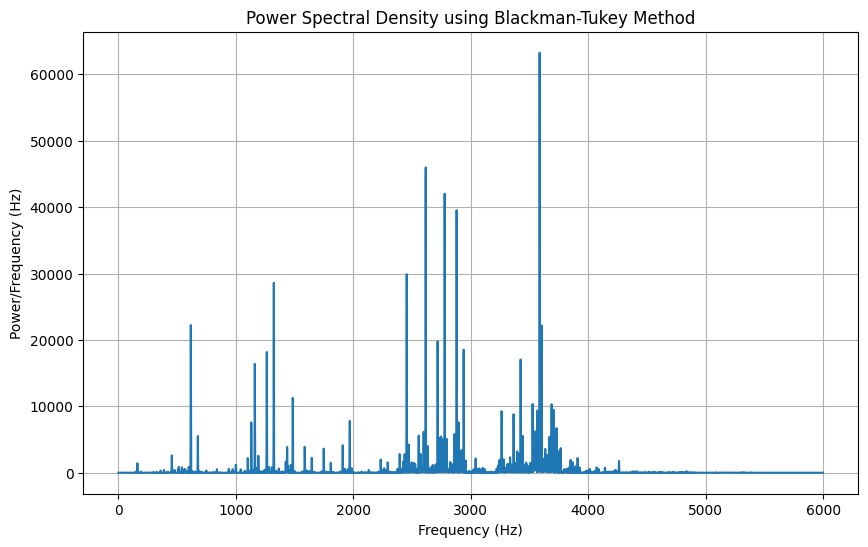

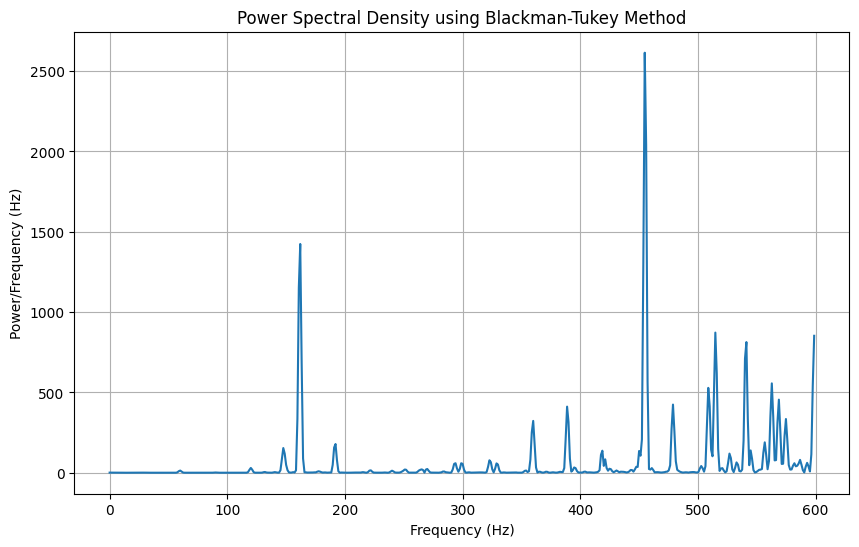

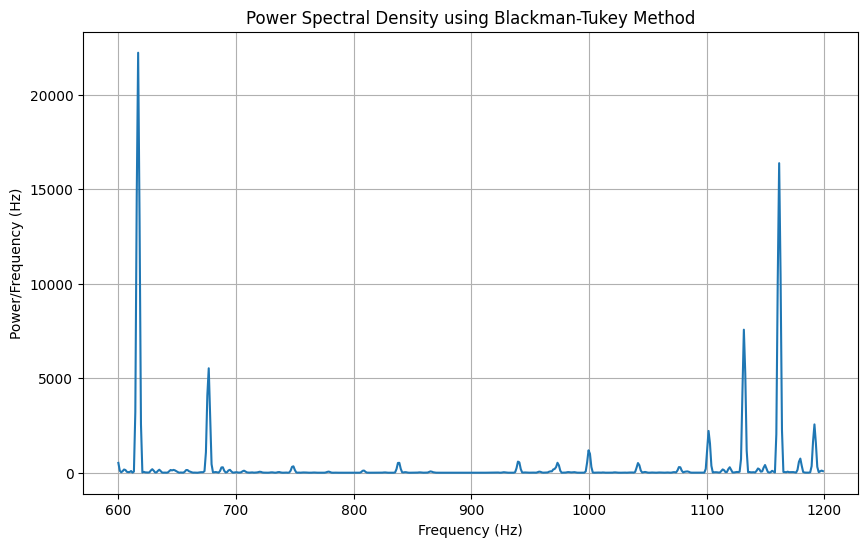

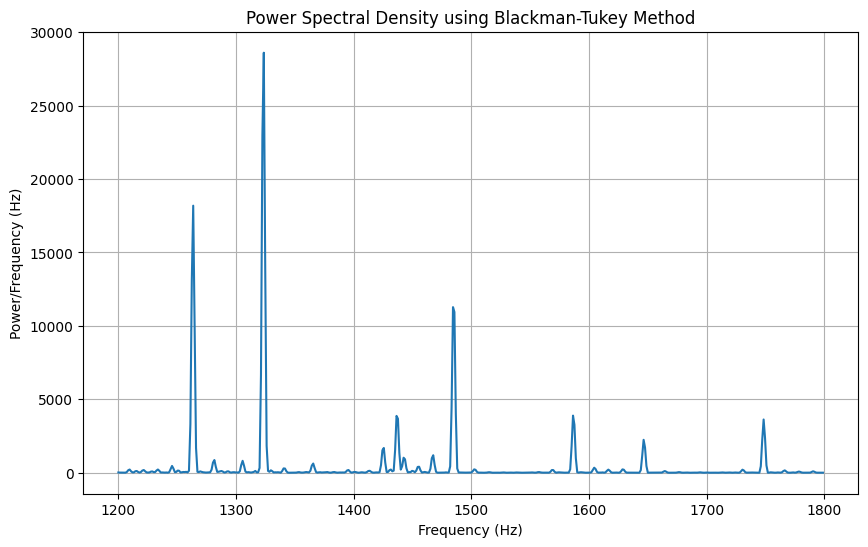

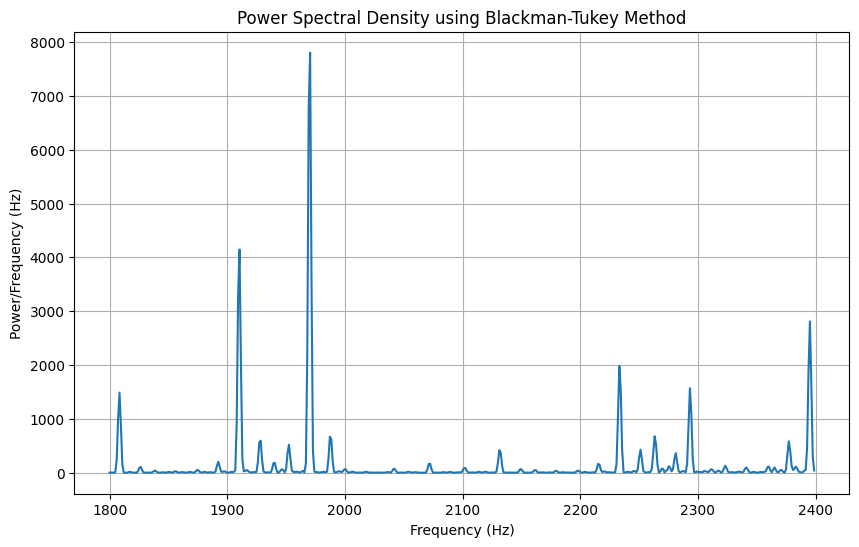

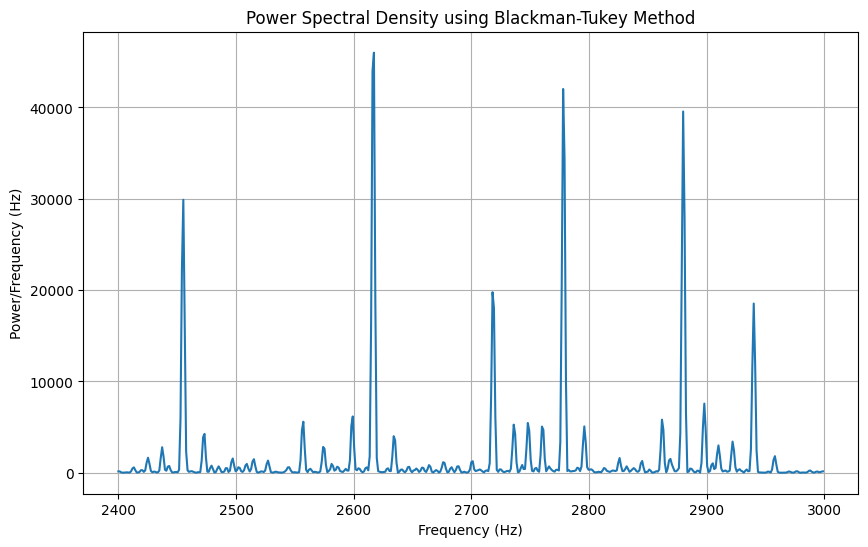

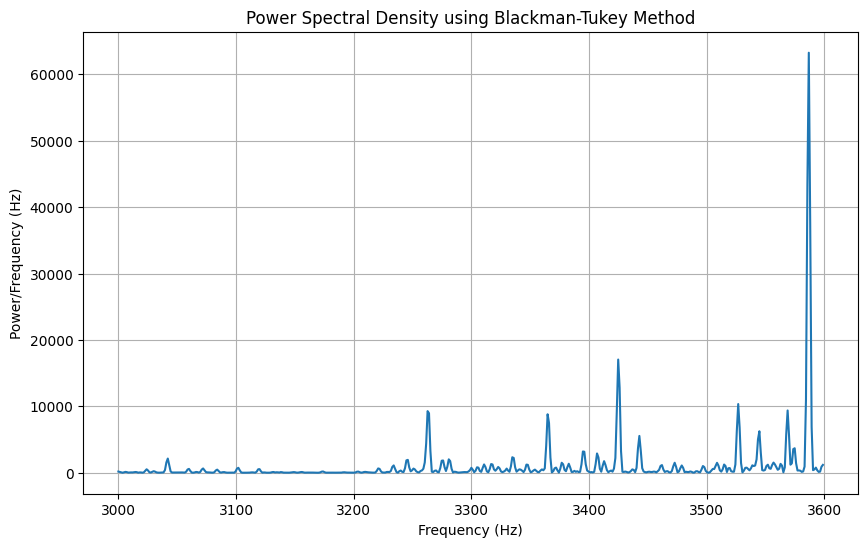

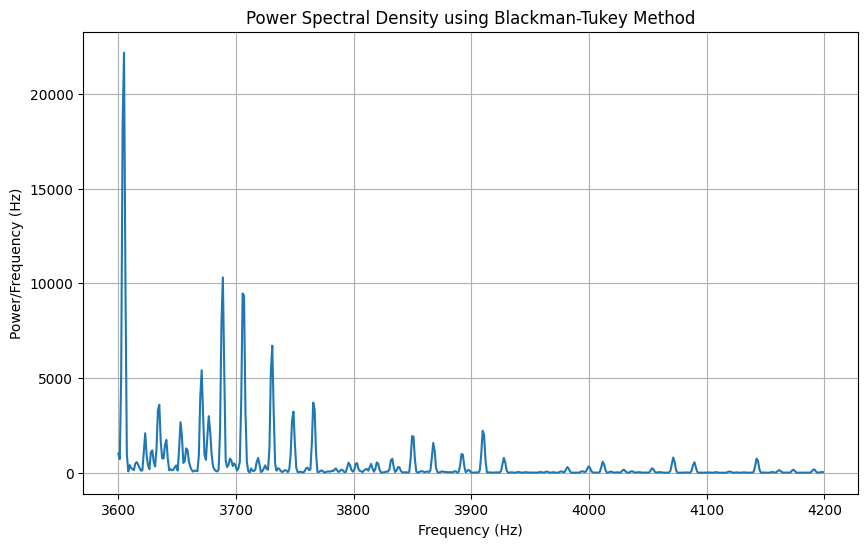

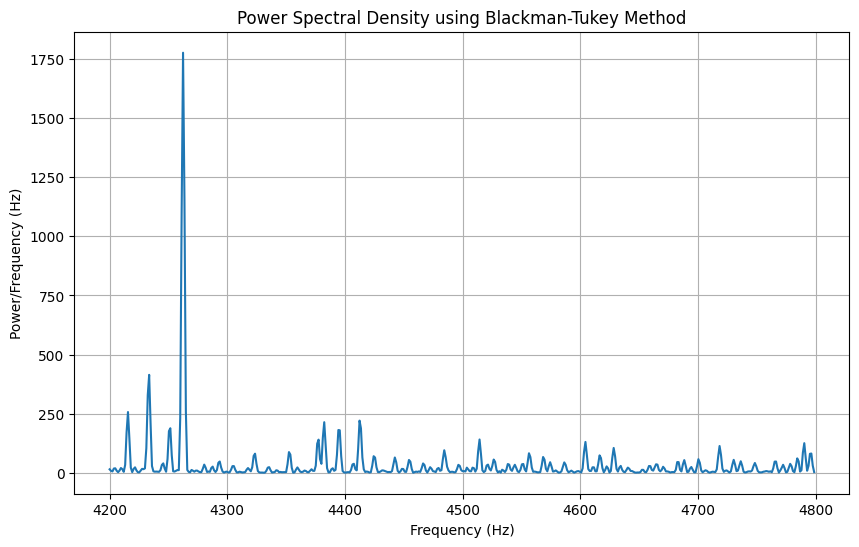

In [23]:
# Generate time axis (optional, for reference)
t = np.linspace(0, CZAS_TRWANIA, ILOSC_PROBEK, endpoint=False)

# Compute the autocorrelation of the signal
def autocorrelation(signal):
    result = np.correlate(signal, signal, mode='full')
    return result[result.size // 2:]

autocorr = autocorrelation(dane)

# Apply a window function (Blackman window)
window = np.blackman(len(autocorr))
windowed_autocorr = autocorr * window

# Perform FFT to get the Power Spectral Density (PSD)
psd = np.fft.fft(windowed_autocorr, n=ILOSC_PROBEK)
psd = np.abs(psd)[:ILOSC_PROBEK // 2]

# Frequency axis
frequencies = np.fft.fftfreq(ILOSC_PROBEK, d=1/CZESTOTLIWOSC_PROBKOWANIA)[:ILOSC_PROBEK // 2]

# Plot the result
plt.figure(figsize=(10, 6))
plt.plot(frequencies, psd)
plt.title('Power Spectral Density using Blackman-Tukey Method')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (Hz)')
plt.grid()
plt.show()

for i in range(0, 4000, 500):
    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(frequencies[i:i+500], psd[i:i+500])
    plt.title('Power Spectral Density using Blackman-Tukey Method')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power/Frequency (Hz)')
    plt.grid()
    plt.show()